In [3]:
from radd import build, vis
from radd.toolbox import analyze
os.mkdir('xsab_vtr')
os.chdir('xsab_vtr')

In [4]:
popt={'a': array([ 0.53625]), 'xb': array([ 0.87761]), 'ssv': -0.98396462152356978, 'tr': array([ 0.17801]), 'v': array([ 1.26793])}

#popt={'a': array([ 0.48227]), 'sso': 0.01804612312742325, 'v': array([ 1.18368, 1.10]), 'xb': array([ 1.43943]), 'ssv': -0.93274357892086091, 'tr': array([ 0.21019])}

m=build.Model(data=redata, kind='xsab', depends_on={'v':'Cond', 'tr':'Cond'}, inits=popt)
yhat=m.simulate(popt)

In [5]:
m.optimize(stage='flat', inits=popt, multiopt=True)

basinhopping step 0: f 0.00244214
basinhopping step 1: f 0.00778789 trial_f 0.00778789 accepted 1  lowest_f 0.00244214
basinhopping step 2: f 0.034837 trial_f 0.034837 accepted 1  lowest_f 0.00244214
basinhopping step 3: f 0.0749388 trial_f 0.0749388 accepted 1  lowest_f 0.00244214
basinhopping step 4: f 0.171371 trial_f 0.171371 accepted 1  lowest_f 0.00244214
basinhopping step 5: f 0.677087 trial_f 0.677087 accepted 1  lowest_f 0.00244214
basinhopping step 6: f 0.170825 trial_f 0.170825 accepted 1  lowest_f 0.00244214
basinhopping step 7: f 0.170825 trial_f 0.675317 accepted 0  lowest_f 0.00244214
basinhopping step 8: f 0.415256 trial_f 0.415256 accepted 1  lowest_f 0.00244214
basinhopping step 9: f 1.97804 trial_f 1.97804 accepted 1  lowest_f 0.00244214
adaptive stepsize: acceptance rate 0.800000 target 0.500000 new stepsize 0.0555556 old stepsize 0.05
basinhopping step 10: f 2.00581 trial_f 2.00581 accepted 1  lowest_f 0.00244214
basinhopping step 11: f 0.174131 trial_f 0.174131 ac

In [6]:
m.flat_fitinfo

a           0.53527
chi       0.0021851
cnvrg          True
ndata            16
nfev            133
nvary             5
ssv        -0.98604
tr          0.17811
v            1.2662
xb          0.86314
df               11
rchi     0.00019865
logp        -136.38
AIC         -126.38
BIC            -132
dtype: object

In [7]:
p = m.__nudge_params__(m.flat_popt)

In [8]:
p

{'a': array([ 0.53808]),
 'ssv': -0.98873364270337127,
 'tr': array([ 0.17374,  0.18084]),
 'v': array([ 1.28942,  1.23886]),
 'xb': array([ 0.85862])}

In [68]:
m.opt.basinhopping_full(p, is_flat=False)

basinhopping step 0: f 0.00793745
basinhopping step 1: f 0.279884 trial_f 0.279884 accepted 1  lowest_f 0.00793745
basinhopping step 2: f 0.279884 trial_f 0.753483 accepted 0  lowest_f 0.00793745
basinhopping step 3: f 1.91122 trial_f 1.91122 accepted 1  lowest_f 0.00793745
basinhopping step 4: f 1.91122 trial_f 2.75374 accepted 0  lowest_f 0.00793745
basinhopping step 5: f 0.526041 trial_f 0.526041 accepted 1  lowest_f 0.00793745
basinhopping step 6: f 0.493156 trial_f 0.493156 accepted 1  lowest_f 0.00793745
basinhopping step 7: f 0.290559 trial_f 0.290559 accepted 1  lowest_f 0.00793745
basinhopping step 8: f 0.0735269 trial_f 0.0735269 accepted 1  lowest_f 0.00793745
basinhopping step 9: f 0.169266 trial_f 0.169266 accepted 1  lowest_f 0.00793745
adaptive stepsize: acceptance rate 0.700000 target 0.500000 new stepsize 0.0555556 old stepsize 0.05
basinhopping step 10: f 0.191089 trial_f 0.191089 accepted 1  lowest_f 0.00793745
basinhopping step 11: f 0.65354 trial_f 0.65354 accepted

({'a': array([ 0.53808]),
  'ssv': -0.98873364270337127,
  'tr': array([ 0.17374,  0.18084]),
  'v': array([ 1.28942,  1.23886]),
  'xb': array([ 0.85862])},
 0.0079374488947904151)

In [70]:
vtrpopt = {'a': array([ 0.53808]),
  'ssv': -0.98873364270337127,
  'tr': array([ 0.17374,  0.18084]),
  'v': array([ 1.28942,  1.23886]),
  'xb': array([ 0.85862])}

In [76]:
m.optimize(stage='conditional', multiopt=False, inits=vtrpopt)

Optimization terminated successfully.
         Current function value: 0.000022
         Iterations: 50
         Function evaluations: 118


In [77]:
m.fitinfo

a            0.53808
chi        0.0062975
cnvrg           True
ndata             32
nfev             118
nvary              4
ssv         -0.98873
tr_bsl       0.17344
tr_pnl       0.17808
v_bsl         1.2695
v_pnl         1.2474
xb           0.85862
df                28
rchi      0.00022491
logp         -268.79
AIC          -260.79
BIC          -263.94
dtype: object

In [73]:
m.fits=m.simulate(vtrpopt)

In [80]:
m.fitinfo.to_csv('fitinfo.csv')

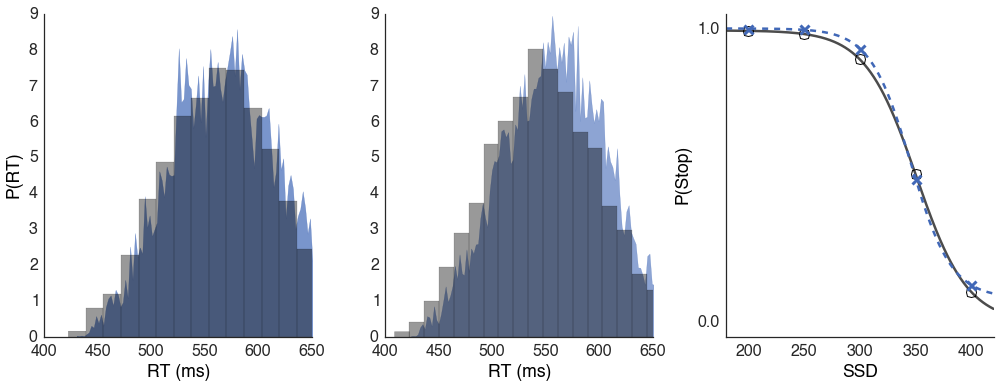

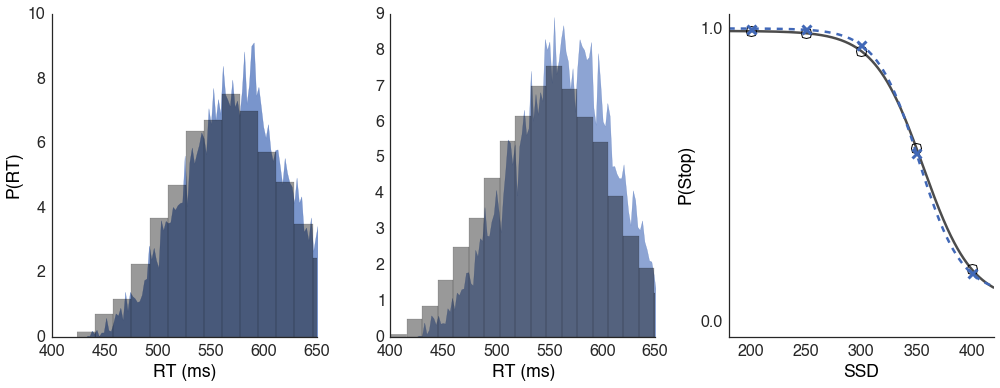

In [78]:
yhat=m.fits
vis.plot_fits(m.avg_y[0], yhat.reshape(2,16)[0], cdf=False)
vis.plot_fits(m.avg_y[1], yhat.reshape(2,16)[1], cdf=False)

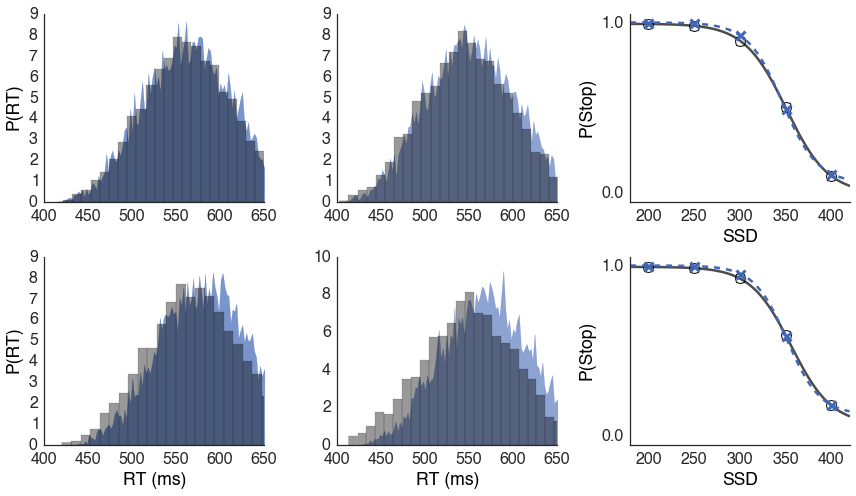

In [21]:
vis.react_fit_plots(m, save=True)